In [351]:
PATH_DATABASE = "./database/adult"
DATABASE_EXTENSION = ".csv"
TARGET_NAME = "class"

In [352]:
def load_data ():
    return pd.read_csv(PATH_DATABASE + DATABASE_EXTENSION, encoding='latin-1', delimiter=',')

In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.impute import SimpleImputer 
from imblearn.under_sampling import RandomUnderSampler, TomekLinks

In [354]:
def split_features_target (db):
    return db.drop(TARGET_NAME, axis = 1), db[TARGET_NAME]

In [355]:
def encode_data (db, cols):
    le = LabelEncoder()

    for col in cols:
        db[col] = le.fit_transform(db[col])
    return db

In [356]:
def dummy_data (db, cols):
    return pd.get_dummies(db, columns = cols)

In [357]:
def fill_missingValues (db):
    si = SimpleImputer(strategy='most_frequent')

    db = db.replace('?', np.nan)
    return pd.DataFrame(si.fit_transform(db), columns=db.columns)

In [358]:
def under_sampling (X, y):
    #tl = TomekLinks()
    rus = RandomUnderSampler(random_state=49)
    return rus.fit_resample (X, y)


In [359]:
database = load_data()
database

,age,work-class,fnlwgt,education,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-pre-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [360]:
database = fill_missingValues(database)

In [361]:
database.dropna(axis=0, how='any', inplace=True)
database.drop(['fnlwgt','education'], axis=1, inplace=True)
features, target = split_features_target(database)
features

,age,work-class,edu-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-pre-week,native-country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
48838,64,Private,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


**Colunas para dummy e encode**

In [362]:
colsToEncode = ['sex']
colsToDummy = ['work-class', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

**Encoding**

In [363]:
features = encode_data(features, colsToEncode)
features = dummy_data(features, colsToDummy)
features

,age,edu-num,sex,capital-gain,capital-loss,hours-pre-week,work-class_Federal-gov,work-class_Local-gov,work-class_Never-worked,work-class_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,1,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,7,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,13,0,0,0,36,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48838,64,9,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48839,38,13,1,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,44,13,1,5455,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


**Preparando para rodar árvore**

In [364]:
x_prev = features.values
X_train, X_test, y_train, y_test = train_test_split(x_prev, target, test_size=0.2, random_state=0)

In [365]:
X_train, y_train = under_sampling(X_train, y_train)

In [366]:
y_train.value_counts()

<=50K    9390
>50K     9390
Name: class, dtype: int64

**Rodando GRID SEARCH**

In [367]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'max_features':[None,'sqrt','log2', 0.2, 0.4, 0.6, 0.8, 1],
    'splitter': ['best', 'random'],
    'random_state': [0,42],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
    }

In [368]:
decisionTreeGS = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=3,
    n_jobs=5,
    verbose=1,
)
decisionTreeGS.fit(X_train, y_train)
print(decisionTreeGS.best_params_)
print(decisionTreeGS.best_score_)

Fitting 3 folds for each of 11520 candidates, totalling 34560 fits
{'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.6, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
0.8222577209797658


In [369]:
decisionTree = DecisionTreeClassifier(criterion='gini', random_state=10) 
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [370]:
previsoes = decisionTree.predict(X_test)
previsoes

array(['<=50K', '>50K', '<=50K', ..., '>50K', '<=50K', '>50K'],
      dtype=object)

0.7743883713788514

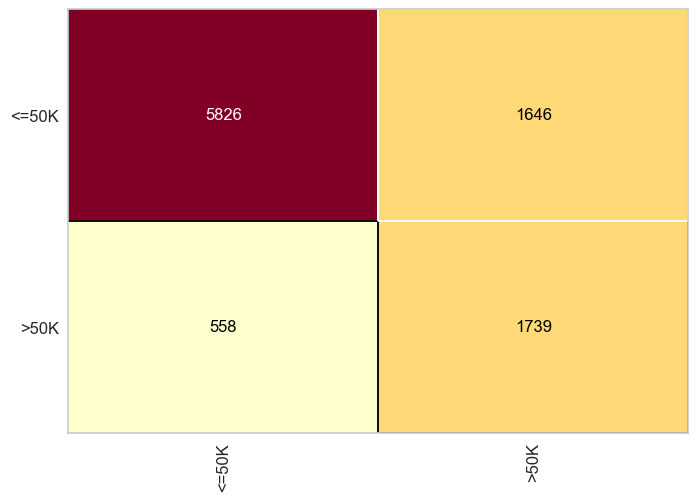

In [371]:
confusion = ConfusionMatrix(decisionTree)
confusion.fit(X_train, y_train)
confusion.score(X_test, y_test)

In [372]:
print(classification_report(y_test, previsoes))

              precision    recall  f1-score   support

       <=50K       0.91      0.78      0.84      7472
        >50K       0.51      0.76      0.61      2297

    accuracy                           0.77      9769
   macro avg       0.71      0.77      0.73      9769
weighted avg       0.82      0.77      0.79      9769



**Naive Bayes**

In [373]:
params_nb = {
    'var_smoothing': np.logspace(0,-9, num=100),
}

naiveBayesGS = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=params_nb,
    cv=3,
    n_jobs=5,
    verbose=1,
)
naiveBayesGS.fit(X_train, y_train)
print(naiveBayesGS.best_params_)
print(naiveBayesGS.best_score_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'priors': None, 'var_smoothing': 1e-09}
0.7974440894568691


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
300 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\naive_bayes.py", line 267, in fit
    return self._partial_fit(
           ^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\naive_bayes.py", line 457, in _partial_fit
    raise ValueError("The sum of the priors should be 1.")
ValueError: The sum of the priors should 

0.8021291841539564

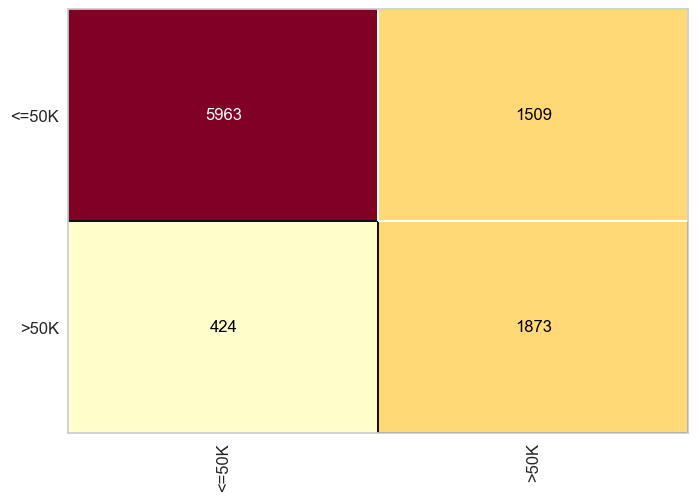

In [374]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes_nb = naive_bayes.predict(X_test)
confusion_nb = ConfusionMatrix(naive_bayes)
confusion_nb.fit(X_train, y_train)
confusion_nb.score(X_test, y_test)

In [375]:
params_rf = {
    'bootstrap': True,
    'criterion': 'mse',
    'max_depth': None,
    'max_features': 'auto',
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0.0,
    'min_impurity_split': None,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'n_estimators': 10,
    'n_jobs': 1,
    'oob_score': False,
    'random_state': 42,
    'verbose': 0,
    'warm_start': False
}

randomForestGS = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params_rf,
    cv=3,
    n_jobs=5,
    verbose=1,
)
randomForestGS.fit(X_train, y_train)
print(randomForestGS.best_params_)
print(randomForestGS.best_score_)

Fitting 3 folds for each of 11520 candidates, totalling 34560 fits


ValueError: Invalid parameter 'splitter' for estimator RandomForestClassifier(max_features=None, random_state=0). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

0.8060190398198382

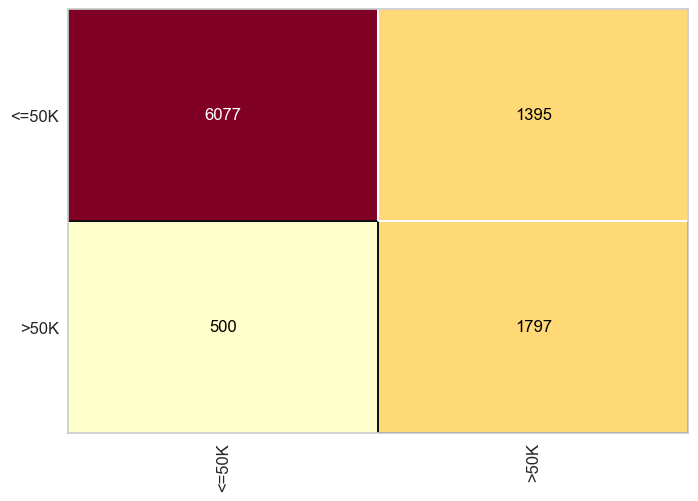

In [ ]:
random_forest = RandomForestClassifier(n_estimators=10, max_features=3, criterion='gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes_rf = random_forest.predict(X_test)
confusion_rf = ConfusionMatrix(random_forest)
confusion_rf.fit(X_train, y_train)
confusion_rf.score(X_test, y_test)